# Heavy Rain - IFS
---

In this evaluation, we will focus on rainfall and mean sea level pressure from 31 January to 3 February 2025. The example shows analysis of the following parameters:
- [`msl`](https://codes.ecmwf.int/grib/param-db/151) mean sea level pressure, and
- [`tp`](https://codes.ecmwf.int/grib/param-db/228) total precipitation of the **IFS** ensemble products.

:::{tip}
If you have not visited the [Heavy Rain - AIFS](./heavy-rain-aifs.ipynb) website yet, we highly recommend you to do so before proceeding further with the analysis.
:::

## 1. Set Up Your Environment and Find ECMWF Open Data
If the packages are not installed yet, uncomment the code below and run it.

In [ ]:
# !pip3 install earthkit ecmwf-opendata xarray

In [1]:
from ecmwf.opendata import Client
import earthkit.data as ekd
import xarray as xr
import earthkit.plots as ekp

(content:references:listParam_hri)=
### List of parameters to retrieve from open datasets
The selected values below can be modified.
- Parameters available on a single level:

In [2]:
PARAM_SFC = "tp"
LEVELTYPE = "sfc"

DATES = [20250131]
TIME = 0
STEPS = 96
STREAM = "enfo"
TYPE = ["cf", "pf"]
MODEL = "ifs"

To calculate [ensemble mean and spread](https://confluence.ecmwf.int/display/FUG/Section+8.1.2+ENS+Mean+and+Spread), we need both the `cf` and `pf` type. This means that we will download the control forecast as well as all 50 ensemble members. <br>
In this case, the ensemble median is more suited than ensemble mean, because the precipitation parameter usually has skewed distributions.

(content:references:getData_hri)=
### Get the data using the ECMWF Open Data API

In [3]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. Ensemble median of total precipitation

The `tp` parameter and `step=96` give information about total accumulated rainfall from 00 UTC up to 4 days ahead. <br>
We will sort the ensemble member numbers in an ascending order.

:::{tip}
To learn more about how to arrange GRIB data using its metadata, visit the [GRIB selection](https://earthkit-data.readthedocs.io/en/latest/examples/grib_selection.html) website.
:::

In [4]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select IFS model data on 31 January 2025
ds = ekd.from_source("file", list_of_files[0])
ds = ds.order_by(["number"])
ds.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,tp,surface,0,20250131,0,0-96,cf,0,regular_ll
1,ecmf,tp,surface,0,20250131,0,0-96,pf,1,regular_ll
2,ecmf,tp,surface,0,20250131,0,0-96,pf,2,regular_ll
3,ecmf,tp,surface,0,20250131,0,0-96,pf,3,regular_ll
4,ecmf,tp,surface,0,20250131,0,0-96,pf,4,regular_ll
5,ecmf,tp,surface,0,20250131,0,0-96,pf,5,regular_ll
6,ecmf,tp,surface,0,20250131,0,0-96,pf,6,regular_ll
7,ecmf,tp,surface,0,20250131,0,0-96,pf,7,regular_ll
8,ecmf,tp,surface,0,20250131,0,0-96,pf,8,regular_ll
9,ecmf,tp,surface,0,20250131,0,0-96,pf,9,regular_ll


We will calculate the median of all the ensemble members. The units will be automatically converted to milimeters by the `earthkit` package.

:::{important}
Some units of our data can be converted using `units` option, however, this is not possible for all of the parameters in the GRIB file. 
:::

:::{note}
GRIB ensemble forecast data will be converted to Xarray using `to_xarray()` method. [Here](https://earthkit-data.readthedocs.io/en/latest/examples/xarray_engine_ensemble.html) you can find out more about ensemble data and `earthkit-data` package.
:::

:::{important}
[To convert Xarray back to GRIB](https://earthkit-data.readthedocs.io/en/latest/examples/xarray_engine_to_grib.html), we set global Xarray `keep_attrs` option to copy variable attributes into a modified Xarray dataset. They are needed for the Xarray to GRIB conversion.
:::

In [5]:
xr.set_options(keep_attrs=True)

dsx = ds.to_xarray()
tpx = dsx['tp']
median_tp = tpx.median("number")
median_tp = median_tp.assign_attrs(tpx.attrs)
median_tp.attrs['units'] = 'mm'
median_tp

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)> Size: 8MB
array([[0.00454712, 0.00454712, 0.00454712, ..., 0.00454712, 0.00454712,
        0.00454712],
       [0.00473022, 0.00473022, 0.00473022, ..., 0.00473022, 0.00473022,
        0.00473022],
       [0.00498962, 0.00497437, 0.00494385, ..., 0.00500488, 0.00500488,
        0.00500488],
       ...,
       [0.00042725, 0.00042725, 0.00042725, ..., 0.00042725, 0.00042725,
        0.00042725],
       [0.00059509, 0.00059509, 0.00059509, ..., 0.00059509, 0.00059509,
        0.00059509],
       [0.00018311, 0.00018311, 0.00018311, ..., 0.00018311, 0.00018311,
        0.00018311]], shape=(721, 1440))
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    standard_name:  unknown
    long_name:      Total precipitation
    units:          mm
    _earthkit:      {'message': b'GRIB\xff\xff\x00\x02\x00\x00\x00\x00\x00\x0...

After calculating the ensemble median, we can convert the Xarray dataset into a GRIB fieldlist using `to_fieldlist()`. The `head()` method displays up to 5 messages. When using `n` as a keyword argument, we can list any number of rows (if they are available).

In [6]:
tp = median_tp.earthkit.to_fieldlist()
tp.head()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,tp,surface,0,20250131,0,0-96,cf,0,regular_ll


## 3. Ensemble mean and spread of mean sea level pressure

The input values can also be set [here](#content:references:listParam_hri).

In [8]:
PARAM_SFC = "msl"
LEVELS = []
LEVELTYPE = "sfc"

DATES = [20250131]
TIME = 0
STEPS = 72
STREAM = "enfo"
TYPE = ["cf", "pf"]
MODEL = "ifs"

In [9]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select IFS model data on 31 January 2025
ds_msl = ekd.from_source("file", list_of_files[0])
ds_msl = ds_msl.order_by(["number"])
ds_msl.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,meanSea,0,20250131,0,72,cf,0,regular_ll
1,ecmf,msl,meanSea,0,20250131,0,72,pf,1,regular_ll
2,ecmf,msl,meanSea,0,20250131,0,72,pf,2,regular_ll
3,ecmf,msl,meanSea,0,20250131,0,72,pf,3,regular_ll
4,ecmf,msl,meanSea,0,20250131,0,72,pf,4,regular_ll
5,ecmf,msl,meanSea,0,20250131,0,72,pf,5,regular_ll
6,ecmf,msl,meanSea,0,20250131,0,72,pf,6,regular_ll
7,ecmf,msl,meanSea,0,20250131,0,72,pf,7,regular_ll
8,ecmf,msl,meanSea,0,20250131,0,72,pf,8,regular_ll
9,ecmf,msl,meanSea,0,20250131,0,72,pf,9,regular_ll


We will plot mean sea level pressure data in hPa, therefore we need to divide them by 100.
- ensemble mean

In [10]:
dsx = ds_msl.to_xarray()
mslx = dsx['msl'] / 100
mean_msl = mslx.mean("number")
mean_msl = mean_msl.assign_attrs(mslx.attrs)
mean_msl.attrs['units'] = 'hPa'
mean_msl

<xarray.DataArray 'msl' (latitude: 721, longitude: 1440)> Size: 8MB
array([[ 984.708125  ,  984.708125  ,  984.708125  , ...,  984.708125  ,
         984.708125  ,  984.708125  ],
       [ 984.43753676,  984.43596814,  984.43283088, ...,  984.44930147,
         984.44694853,  984.44067402],
       [ 984.01400735,  984.00616422,  983.99832108, ...,  984.03439951,
         984.02420343,  984.01636029],
       ...,
       [1012.34890931, 1012.35439951, 1012.35832108, ..., 1012.33322304,
        1012.33714461, 1012.34185049],
       [1013.10420343, 1013.10577206, 1013.10655637, ..., 1013.09871324,
        1013.10028186, 1013.1026348 ],
       [1012.90185049, 1012.90185049, 1012.90185049, ..., 1012.90185049,
        1012.90185049, 1012.90185049]], shape=(721, 1440))
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          hPa
    _earthkit:      {'message': b'GRIB\xff\xff\x00\x02\x00\x00\x00\x00\x00\x0...

In [11]:
msl = mean_msl.earthkit.to_fieldlist()
msl.describe("msl")

shortName,msl
typeOfLevel,meanSea
level,0
date,20250131
time,0
step,72
paramId,151
class,od
stream,enfo
type,cf
experimentVersionNumber,0001


- ensemble spread

In [12]:
spread_msl = mslx.std("number")
spread_msl = spread_msl.assign_attrs(mslx.attrs)
spread_msl.attrs['units'] = 'hPa'
spread_msl

<xarray.DataArray 'msl' (latitude: 721, longitude: 1440)> Size: 8MB
array([[4.65463986, 4.65463986, 4.65463986, ..., 4.65463986, 4.65463986,
        4.65463986],
       [4.66974747, 4.67063552, 4.67085929, ..., 4.66862675, 4.66759503,
        4.66711745],
       [4.68393807, 4.68791142, 4.68749155, ..., 4.68400611, 4.68440665,
        4.68283458],
       ...,
       [1.08843251, 1.08984146, 1.08775971, ..., 1.08808302, 1.08707048,
        1.08680026],
       [1.19467691, 1.19340221, 1.19349838, ..., 1.19125214, 1.19189004,
        1.1932432 ],
       [1.10553088, 1.10553088, 1.10553088, ..., 1.10553088, 1.10553088,
        1.10553088]], shape=(721, 1440))
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          hPa
    _earthkit:      {'message': b'GRIB\xff\xff\x00\x02\x00\x00\x00\x00\x00\x0...

In [13]:
msl_std = spread_msl.earthkit.to_fieldlist()
msl_std.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,meanSea,0,20250131,0,72,cf,0,regular_ll


## 4. Data visualisation

The plot below shows analysis of ensemble median of total precipitation on 31 January 2025.

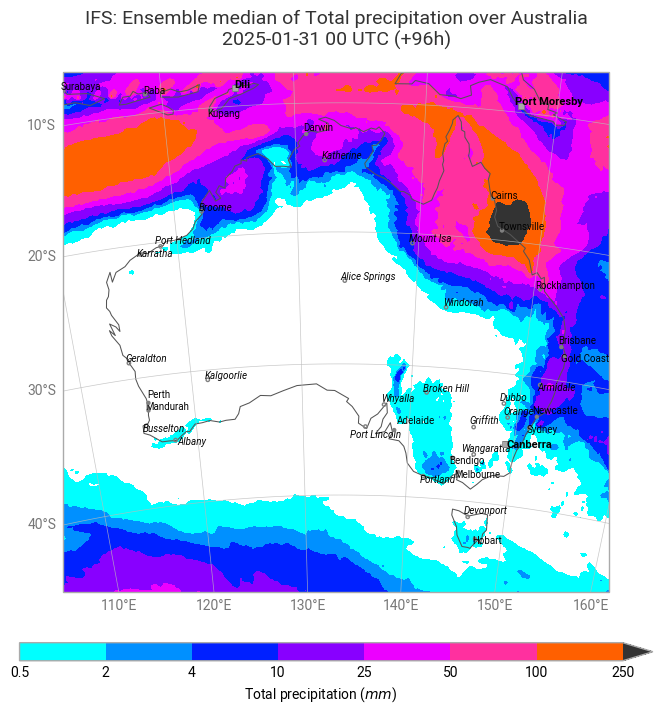

In [7]:
chart = ekp.Map(domain="Australia")

hex_colours = ['#00ffff', '#0080ff', '#0000ff', '#d900ff', '#ff00ff', '#ff8000', '#ff0000', '#333333', ]

tp_shade = ekp.styles.Style(
    colors = hex_colours,
    levels = [0.5, 2, 4, 10, 25, 50, 100, 250],
    units = "mm",
    extend = "max",
)

chart.contourf(tp, style=tp_shade)

chart.coastlines(resolution="low")
chart.gridlines()
chart.cities(adjust_labels=True)

chart.legend(location="bottom", label="{variable_name} ({units})")

chart.title(
    "IFS: Ensemble median of {variable_name} over {domain}\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)
chart.save(f"./plots/{PARAM_SFC}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
chart.show()

The plot below show analysis of ensemble mean and spread of mean sea level pressure on 31 January at 00 UTC and for `step=72`.

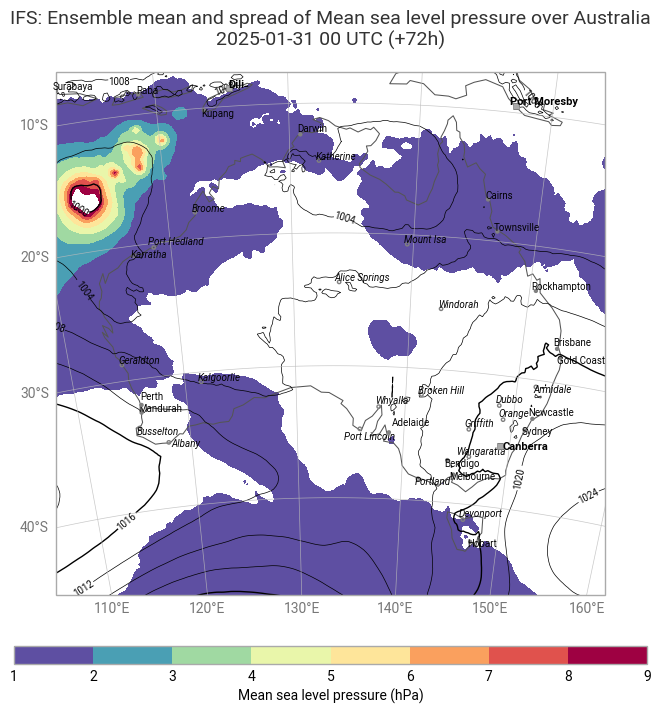

In [16]:
chart = ekp.Map(domain="Australia")

mslstd_style = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(1, 10, 1),
)

chart.contourf(msl_std, style=mslstd_style)
chart.contour(msl,
              levels={"step": 4, "reference": 1000},
              linecolors="black",
              linewidths=[0.5, 1, 0.5, 0.5],
              labels = True,
              legend_style = None,
              transform_first=True)

chart.coastlines(resolution="low")
chart.gridlines()
chart.cities(adjust_labels=True)

chart.legend(location="bottom", label="{variable_name} (hPa)")

chart.title(
    "IFS: Ensemble mean and spread of {variable_name} over {domain}\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)
chart.save(f"./plots/{PARAM_SFC}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
chart.show()